<a href="https://colab.research.google.com/github/taguinara/PLN_tweets/blob/main/analysis_tweets__Tainara%20Almeida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Análise de Dados - tweets sobre o covid-19.**
---

**Sumário**

1. Introdução
2. Análise de sentimentos dos tweets sobre o covid
3. NLTK
4. Criação do modelo (detecção de emoção em frases com o algoritmo Naive Bayes)
5. Conclusão
6. Referência bibliográfica

# **1. Introdução**

A linguagem natural se refere à maneira como nós, humanos, nos comunicamos uns com os outros, no cotidiano. O Processamento de Linguagem Natural (PNL), é uma subárea da inteligência artificial (IA), que lida com a linguagem escrita e falada. Você pode usar a PNL para construir soluções que extraiam significado semântico de texto ou fala, ou que formule respostas significativas em linguagem natural. É um termo coletivo que se refere a automático processamento computacional de linguagens humanas. PLN inclui os dois algoritmos que usam texto produzido por humanos como entrada e algoritmos que produzem aparência natural texto como saídas. Uma aplicação do PNL é a análise de sentimentos, na qual os scripts atribuem automaticamente um sentimento positivo, negativo ou neutro a uma ampla variedade de textos de entrada relacionados a uma organização, como tweets, artigos de notícias ou formulários de feedback do cliente.

Em 2020, o mundo foi surpreendido com uma doença infecciosa chamada como coronavírus (COVID-19), causada pelo vírus SARS-CoV-2. Desta forma, vamos analizar tweets feitos sobre o tema.

# **2. Análise de sentimentos dos tweets sobre o covid**
A análise de sentimento é uma técnica de descoberta de conhecimento por meio da mineração de dados, sua finalidade é revelar a opinião das pessoas sobre temas específicos. Essa é uma técnica apropriada para aplicação em fontes de dados não estruturados.

In [179]:
from nltk import word_tokenize
import csv
import nltk
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [172]:
tweets = pd.read_csv("/content/drive/MyDrive/Dados/tweets_limpos.csv", sep=';')

In [173]:
tweets.head(10)

,creation date,text,classification
0,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,16/03/2020,As news of the regionÂ’s first confirmed COVID...,Positive
4,16/03/2020,Cashier at grocery store was sharing his insig...,Positive
5,16/03/2020,Was at the supermarket today. Didn't buy toile...,Neutral
6,16/03/2020,Due to COVID-19 our retail store and classroom...,Positive
7,16/03/2020,"For corona prevention,we should stop to buy th...",Negative
8,16/03/2020,All month there hasn't been crowding in the su...,Neutral
9,16/03/2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive


In [132]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   creation date   562 non-null    object
 1   text            562 non-null    object
 2   classification  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


**Os tweets analisados possuem categorização de sentimentos. Sendo eles: Positive, Negative, Neutral, Extremely Positive e Extremely Negative.
Abaixo segue a quantidade de linhas de cada categoria, tendo em vista que ela se refere a amostra de 562 tweets.**

In [48]:
tweets.classification.value_counts()

Positive              165
Negative              154
Neutral                93
Extremely Positive     80
Extremely Negative     70
Name: classification, dtype: int64

**Vimos que o resultado foi de maioria para os tweets categorizados como positivos (positive).**

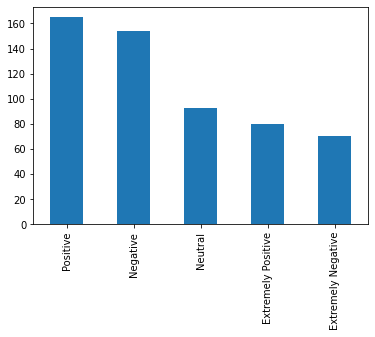

In [49]:
%matplotlib inline
tweets.classification.value_counts().plot(kind="bar")

In [50]:
tweets.count()

creation date     562
text              562
classification    562
dtype: int64

In [51]:
# Remoção de linhas duplicadas
tweets.drop_duplicates(('text'), inplace=True)

In [52]:
tweets.text.count()

562

**Separando tweets e suas classes**

In [94]:
textos = tweets['text']
classes = tweets['classification']

**Vocabulário**

In [162]:
# Contagem de palavras da amostra
len(tweets)

562

# **3. NLTK**

NLTK significa Natural Language Toolkit. É uma biblioteca que possui ferramentas úteis para a utilização dos princípios de PLN. Assim como funcionalidades para manipulação de strings. Interfaces padrões para realizar tarefas como
etiquetar textos, frequência de palavras, lematização e stemmização de palavras, entre vários outros.
Instalação da biblioteca. Mais informações (https://www.nltk.org/install.html)


In [54]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Pré-processamento**

Os dados coletados na análise foram disponibilizados pela Smarkio. Dessa forma vamos passar para a etapa de pré-processamento que consiste na organização e tratamento dos dados. 
A mineração de textos é uma extensão da mineração de dados, e pode ser definida como um processo de extração de informações novas e úteis a partir de documentos textuais escritos em linguagem natural. 


**Stopwords**

Stopwords são palavras que podem ser
consideradas irrelevantes para um certo
resultado buscado. São artigos, preposições, conjunções, por exemplo.

In [55]:
def RemoveStopWords(instancia):
  stopwords = set(nltk.corpus.stopwords.words('english'))
  palavras = [i for i in instancia.split() if not i in stopwords]
  return ("".join(palavras))

**Stemming**

É o processo de reduzir palavras ao seu radical.

In [56]:
def RemoveStopWords(instancia):
  stemmer = nltk.stem.RSLPStemmer()
  palavras = []
  for w in instancia.split():
    palavras.append(stemmer.stem(w))
    return ("".join(palavras))

In [57]:
# Remove links, pontos, vírgulas, ponto e vírgula dos tweets
def Limpeza_dados(instancia):
  instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','')
  return(instancia)

**Lematização**

Consiste em reduzir a palavra à
sua forma canônica, levando em conta sua
classe gramatical.

In [58]:
from nltk import WordNetLemmatizer
word_net_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return ("".join(palavras))

In [59]:
def Preprocessing(instancia):
  stemmer = nltk.stem.RSLPStemmer()
  instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','')
  stopwords = set(nltk.corpus.stopwords.words('english'))
  palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
  return ("".join(palavras))

In [101]:
# Aplica a função em todos os dados
texto_limpo = [Preprocessing(i) for i in tweets]

In [142]:
textos[:10]

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    As news of the regionÂ’s first confirmed COVID...
4    Cashier at grocery store was sharing his insig...
5    Was at the supermarket today. Didn't buy toile...
6    Due to COVID-19 our retail store and classroom...
7    For corona prevention,we should stop to buy th...
8    All month there hasn't been crowding in the su...
9    Due to the Covid-19 situation, we have increas...
Name: text, dtype: object

**N-GRAMAS**

O N-grama é uma sequência contígua de n itens de uma determinada amostra de texto ou fala. 

In [175]:
# Bigramas = Sequências de duas letras consecutivas ou dois números consecutivos.

from nltk import bigrams
list(bigrams(tokens))

[('There', 's'),
 ('s', 'a'),
 ('a', 'digital'),
 ('digital', 'literacy'),
 ('literacy', 'movement'),
 ('movement', 'happening'),
 ('happening', 'right'),
 ('right', 'now'),
 ('now', 'amp'),
 ('amp', 'we'),
 ('we', 're'),
 ('re', 'all'),
 ('all', 'students'),
 ('students', 'Support'),
 ('Support', 'the'),
 ('the', 'vulnerable'),
 ('vulnerable', 'in'),
 ('in', 'using'),
 ('using', 'Pharmacy'),
 ('Pharmacy', '2u'),
 ('2u', 'online'),
 ('online', 'shopping'),
 ('shopping', 'video'),
 ('video', 'calls'),
 ('calls', 'iPlayer'),
 ('iPlayer', 'amp'),
 ('amp', 'other'),
 ('other', 'online'),
 ('online', 'tools'),
 ('tools', 'It'),
 ('It', 'WILL'),
 ('WILL', 'be'),
 ('be', 'a'),
 ('a', 'challenge'),
 ('challenge', 'to'),
 ('to', 'teach'),
 ('teach', 'but'),
 ('but', 'it'),
 ('it', 'might'),
 ('might', 'just'),
 ('just', 'save'),
 ('save', 'a'),
 ('a', 'few'),
 ('few', 'lives'),
 ('lives', '!'),
 ('!', ':'),
 (':', ')'),
 (')', ':'),
 (':', '-'),
 ('-', ')'),
 (')', ';'),
 (';', ')'),
 (')', '=D

In [176]:
from nltk import trigrams
list(trigrams(tokens))

[('There', 's', 'a'),
 ('s', 'a', 'digital'),
 ('a', 'digital', 'literacy'),
 ('digital', 'literacy', 'movement'),
 ('literacy', 'movement', 'happening'),
 ('movement', 'happening', 'right'),
 ('happening', 'right', 'now'),
 ('right', 'now', 'amp'),
 ('now', 'amp', 'we'),
 ('amp', 'we', 're'),
 ('we', 're', 'all'),
 ('re', 'all', 'students'),
 ('all', 'students', 'Support'),
 ('students', 'Support', 'the'),
 ('Support', 'the', 'vulnerable'),
 ('the', 'vulnerable', 'in'),
 ('vulnerable', 'in', 'using'),
 ('in', 'using', 'Pharmacy'),
 ('using', 'Pharmacy', '2u'),
 ('Pharmacy', '2u', 'online'),
 ('2u', 'online', 'shopping'),
 ('online', 'shopping', 'video'),
 ('shopping', 'video', 'calls'),
 ('video', 'calls', 'iPlayer'),
 ('calls', 'iPlayer', 'amp'),
 ('iPlayer', 'amp', 'other'),
 ('amp', 'other', 'online'),
 ('other', 'online', 'tools'),
 ('online', 'tools', 'It'),
 ('tools', 'It', 'WILL'),
 ('It', 'WILL', 'be'),
 ('WILL', 'be', 'a'),
 ('be', 'a', 'challenge'),
 ('a', 'challenge', 'to')

In [177]:
from nltk import ngrams
list(ngrams(tokens, 4))

[('There', 's', 'a', 'digital'),
 ('s', 'a', 'digital', 'literacy'),
 ('a', 'digital', 'literacy', 'movement'),
 ('digital', 'literacy', 'movement', 'happening'),
 ('literacy', 'movement', 'happening', 'right'),
 ('movement', 'happening', 'right', 'now'),
 ('happening', 'right', 'now', 'amp'),
 ('right', 'now', 'amp', 'we'),
 ('now', 'amp', 'we', 're'),
 ('amp', 'we', 're', 'all'),
 ('we', 're', 'all', 'students'),
 ('re', 'all', 'students', 'Support'),
 ('all', 'students', 'Support', 'the'),
 ('students', 'Support', 'the', 'vulnerable'),
 ('Support', 'the', 'vulnerable', 'in'),
 ('the', 'vulnerable', 'in', 'using'),
 ('vulnerable', 'in', 'using', 'Pharmacy'),
 ('in', 'using', 'Pharmacy', '2u'),
 ('using', 'Pharmacy', '2u', 'online'),
 ('Pharmacy', '2u', 'online', 'shopping'),
 ('2u', 'online', 'shopping', 'video'),
 ('online', 'shopping', 'video', 'calls'),
 ('shopping', 'video', 'calls', 'iPlayer'),
 ('video', 'calls', 'iPlayer', 'amp'),
 ('calls', 'iPlayer', 'amp', 'other'),
 ('iPla

**Córpus dentro no NLTK**

São uteis para os etiquetadores, entidades nomeadas,
estruturas sintáticas e várias outras funcionalidades.

In [69]:
import nltk
nltk.download('mac_morpho')

[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.


True

In [70]:
nltk.corpus.mac_morpho.tagged_sents()

[[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('Cr$', 'CUR'), ('1,4', 'NUM'), ('milhão', 'N'), ('em', 'PREP|+'), ('a', 'ART'), ('venda', 'N'), ('de', 'PREP|+'), ('a', 'ART'), ('Pinhal', 'NPROP'), ('em', 'PREP'), ('São', 'NPROP'), ('Paulo', 'NPROP')], [('Programe', 'V'), ('sua', 'PROADJ'), ('viagem', 'N'), ('a', 'PREP|+'), ('a', 'ART'), ('Exposição', 'NPROP'), ('Nacional', 'NPROP'), ('do', 'NPROP'), ('Zebu', 'NPROP'), (',', ','), ('que', 'PRO-KS-REL'), ('começa', 'V'), ('dia', 'N'), ('25', 'N|AP')], ...]

In [71]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [72]:
nltk.corpus.mac_morpho.words()

['Jersei', 'atinge', 'média', 'de', 'Cr$', '1,4', ...]

In [73]:
nltk.corpus.mac_morpho.sents()

[['Jersei', 'atinge', 'média', 'de', 'Cr$', '1,4', 'milhão', 'em', 'a', 'venda', 'de', 'a', 'Pinhal', 'em', 'São', 'Paulo'], ['Programe', 'sua', 'viagem', 'a', 'a', 'Exposição', 'Nacional', 'do', 'Zebu', ',', 'que', 'começa', 'dia', '25'], ...]

**Tokenização**

Tokenizar = separar as palavras do texto. Os tokenizadores dividem as strings em listas de substrings.

In [75]:
texto = "There s a digital literacy movement happening right now amp we re all students Support the vulnerable in using Pharmacy 2u online shopping video calls iPlayer amp other online tools It WILL be a challenge to teach but it might just save a few lives ! :) :-) ;) =D"
nltk.word_tokenize(texto)

['There',
 's',
 'a',
 'digital',
 'literacy',
 'movement',
 'happening',
 'right',
 'now',
 'amp',
 'we',
 're',
 'all',
 'students',
 'Support',
 'the',
 'vulnerable',
 'in',
 'using',
 'Pharmacy',
 '2u',
 'online',
 'shopping',
 'video',
 'calls',
 'iPlayer',
 'amp',
 'other',
 'online',
 'tools',
 'It',
 'WILL',
 'be',
 'a',
 'challenge',
 'to',
 'teach',
 'but',
 'it',
 'might',
 'just',
 'save',
 'a',
 'few',
 'lives',
 '!',
 ':',
 ')',
 ':',
 '-',
 ')',
 ';',
 ')',
 '=D']

**Frequência das palavras**

O RegexpTokenizer divide uma string em substrings usando uma expressão regular. O  FreqDist fornece a frequência das palavras em um texto.

In [76]:
# Frequência dos tokens

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(texto)
tokens

['There',
 's',
 'a',
 'digital',
 'literacy',
 'movement',
 'happening',
 'right',
 'now',
 'amp',
 'we',
 're',
 'all',
 'students',
 'Support',
 'the',
 'vulnerable',
 'in',
 'using',
 'Pharmacy',
 '2u',
 'online',
 'shopping',
 'video',
 'calls',
 'iPlayer',
 'amp',
 'other',
 'online',
 'tools',
 'It',
 'WILL',
 'be',
 'a',
 'challenge',
 'to',
 'teach',
 'but',
 'it',
 'might',
 'just',
 'save',
 'a',
 'few',
 'lives',
 'D']

In [119]:
tokenizer = RegexpTokenizer(r'\w+')
frequencia = nltk.FreqDist(tokens)
frequencia.most_common()

[('a', 3),
 ('amp', 2),
 ('online', 2),
 ('There', 1),
 ('s', 1),
 ('digital', 1),
 ('literacy', 1),
 ('movement', 1),
 ('happening', 1),
 ('right', 1),
 ('now', 1),
 ('we', 1),
 ('re', 1),
 ('all', 1),
 ('students', 1),
 ('Support', 1),
 ('the', 1),
 ('vulnerable', 1),
 ('in', 1),
 ('using', 1),
 ('Pharmacy', 1),
 ('2u', 1),
 ('shopping', 1),
 ('video', 1),
 ('calls', 1),
 ('iPlayer', 1),
 ('other', 1),
 ('tools', 1),
 ('It', 1),
 ('WILL', 1),
 ('be', 1),
 ('challenge', 1),
 ('to', 1),
 ('teach', 1),
 ('but', 1),
 ('it', 1),
 ('might', 1),
 ('just', 1),
 ('save', 1),
 ('few', 1),
 ('lives', 1),
 ('D', 1)]

In [80]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(texto)

frequencia = nltk.FreqDist(tokens)
frequencia.most_common()

[('a', 3),
 ('amp', 2),
 ('online', 2),
 ('There', 1),
 ('s', 1),
 ('digital', 1),
 ('literacy', 1),
 ('movement', 1),
 ('happening', 1),
 ('right', 1),
 ('now', 1),
 ('we', 1),
 ('re', 1),
 ('all', 1),
 ('students', 1),
 ('Support', 1),
 ('the', 1),
 ('vulnerable', 1),
 ('in', 1),
 ('using', 1),
 ('Pharmacy', 1),
 ('2u', 1),
 ('shopping', 1),
 ('video', 1),
 ('calls', 1),
 ('iPlayer', 1),
 ('other', 1),
 ('tools', 1),
 ('It', 1),
 ('WILL', 1),
 ('be', 1),
 ('challenge', 1),
 ('to', 1),
 ('teach', 1),
 ('but', 1),
 ('it', 1),
 ('might', 1),
 ('just', 1),
 ('save', 1),
 ('few', 1),
 ('lives', 1),
 ('D', 1)]

In [81]:
from nltk.tokenize import TweetTokenizer

In [82]:
tweet_tokenizer = TweetTokenizer()

In [83]:
tweet_tokenizer.tokenize(texto)

['There',
 's',
 'a',
 'digital',
 'literacy',
 'movement',
 'happening',
 'right',
 'now',
 'amp',
 'we',
 're',
 'all',
 'students',
 'Support',
 'the',
 'vulnerable',
 'in',
 'using',
 'Pharmacy',
 '2u',
 'online',
 'shopping',
 'video',
 'calls',
 'iPlayer',
 'amp',
 'other',
 'online',
 'tools',
 'It',
 'WILL',
 'be',
 'a',
 'challenge',
 'to',
 'teach',
 'but',
 'it',
 'might',
 'just',
 'save',
 'a',
 'few',
 'lives',
 '!',
 ':)',
 ':-)',
 ';)',
 '=D']

In [150]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokens = word_tokenize(texto)
fd = FreqDist(tokens)
fd.most_common(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('a', 3),
 (')', 3),
 ('amp', 2),
 ('online', 2),
 (':', 2),
 ('There', 1),
 ('s', 1),
 ('digital', 1),
 ('literacy', 1),
 ('movement', 1),
 ('happening', 1),
 ('right', 1),
 ('now', 1),
 ('we', 1),
 ('re', 1),
 ('all', 1),
 ('students', 1),
 ('Support', 1),
 ('the', 1),
 ('vulnerable', 1)]

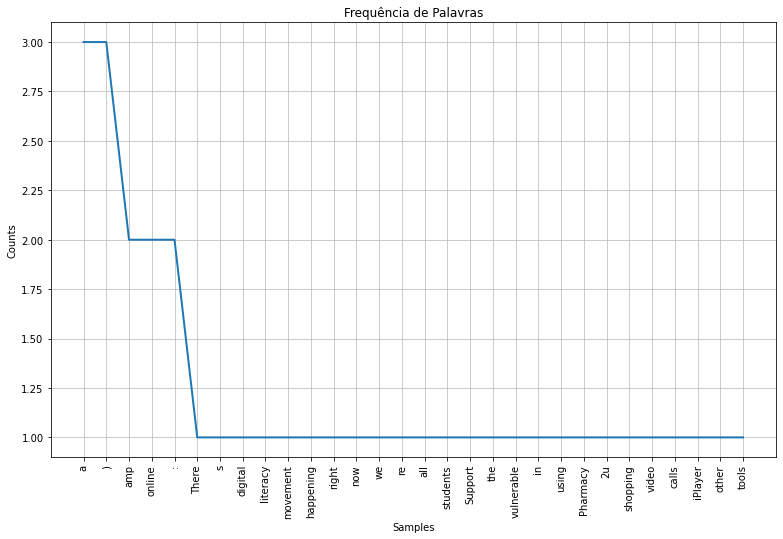

In [151]:
import matplotlib.pyplot as plt
tokens_limpo = word_tokenize(texto)
frequencia = FreqDist(tokens_limpo)
plt.figure(figsize = (13, 8))
frequencia.plot(30, title = "Frequência de Palavras")

In [152]:
# Frequência de vezes que a palavra covid aparece no texto
frequencia['covid']

0

**Etiquetadores**

É o processo de classificar palavras em suas classes gramaticais e rotulá-las de acordo é conhecido como marcação de classe gramatical , marcação POS ou simplesmente marcação. Etiquetador padrão treinado: o nltk.pos_tag(). Os etiquetadores retornam uma tupla (‘palavra’, ‘classe gramatical’).

In [180]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize
pos_tag(word_tokenize("For those who aren't struggling, please consider donating to a food bank or a nonprofit."))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('For', 'IN'),
 ('those', 'DT'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ("n't", 'RB'),
 ('struggling', 'VBG'),
 (',', ','),
 ('please', 'VB'),
 ('consider', 'VB'),
 ('donating', 'VBG'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('food', 'NN'),
 ('bank', 'NN'),
 ('or', 'CC'),
 ('a', 'DT'),
 ('nonprofit', 'JJ'),
 ('.', '.')]

`CC= conjunção coordenadora, RB= advérbio, JJ= adjetivo, VBG = tradução, significado e definição, NN= substantivo, IN= preposição, VB= verbo`

In [181]:
# Um token marcado é representado usando uma tupla que consiste no token e na tag

tagged_token = nltk.tag.str2tuple ('food / NN')
tagged_token [0]

'food '

In [182]:
tagged_token [1]

' NN'

In [183]:
# Manipulação das tuplas: Chunking

texto = [('For', 'IN'), ('those', 'DT'), ('who', 'WP'), ('are', 'VBP'), ("n't", 'RB'), ('struggling', 'VBG'), (',', ','), ('please', 'VB'), ('consider', 'VB'), ('donating', 'VBG'), ('to', 'TO'), ('a', 'DT'), ('food', 'NN'),
 ('bank', 'NN'), ('or', 'CC'), ('a', 'DT'), ('nonprofit', 'JJ'),('.', '.')]

gramatica = "NP: {<DT>? <JJ> * <NN>}" 

cp = nltk.RegexpParser (gramatica)
resultado = cp.parse (texto)
print(resultado)

(S
  For/IN
  those/DT
  who/WP
  are/VBP
  n't/RB
  struggling/VBG
  ,/,
  please/VB
  consider/VB
  donating/VBG
  to/TO
  (NP a/DT food/NN)
  (NP bank/NN)
  or/CC
  a/DT
  nonprofit/JJ
  ./.)


# **4. Criação do modelo** 

Detecção de emoção em frases com o algoritmo Naive Bayes

In [84]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

# vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

**Aplica o vetorizador nos dados de texto**

In [154]:
freq_tweets = vectorizer.fit_transform(textos)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

**Formato (Linhas, Colunas) da matriz**

In [156]:
freq_tweets.shape

(562, 4060)

**Treino do modelo de Machine Learning**

O algoritmo de classificação Naive Bayes é um classificador probabilístico. 

In [155]:
modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Testando o modelo com algumas instâncias simples**

In [157]:
# Lista de tweets encontrado na amostra
testes = ['Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer',
          'Me: I dont need to stock up on food, Ill just have Amazon deliver whatever I need',
          'All month there hasnt been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket.!!!',
          'Me, ready to go at supermarket during the #COVID19 outbreak.']

In [158]:
# Transforma os dados de teste em vetores de palavras:
freq_testes = vectorizer.transform(testes)

In [159]:
# Classificação com o modelo treinado
for t, c in zip (testes,modelo.predict(freq_testes)):
  print (t +", "+ c) 

Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer, Positive
Me: I dont need to stock up on food, Ill just have Amazon deliver whatever I need, Positive
All month there hasnt been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket.!!!, Negative
Me, ready to go at supermarket during the #COVID19 outbreak., Negative


In [160]:
# Probabilidades de cada classe:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']


array([[0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.95, 0.01, 0.04],
       [0.  , 0.  , 0.52, 0.  , 0.48]])

**Criando modelos com Pipelines**

In [161]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])
pipeline_simples.fit(tweets,classes)

# **5. Conclusão**

Considerando a análise de dados realizada à respeito dos tweets sobre o covid-19 (coronavírus). A análise de sentimentos foi executada na amostra de 562 tweets, coletadas a partir da base de dados principal. Os tweets ocorreram no período de 16/03/2020 a 23/03/2020. Assim foram realizados o pré-processamento, utilização do NLTK, que é um conjunto de bibliotecas utilizada para a realização do processamento de linguagem natural. Por fim, a criação do modelo detecção de emoção em frases com o algoritmo Naive Bayes, que  é um classificador probabilístico com uma boa precisão.

Ainda foram utilizados o framework iFeel aplicativo da web, desenvolvido pela UFMG, para análise de sentimento e o Sentigem, que confirmaram assim como na análise realizada, a maioria para comentários categorizados como positivos.

# **6. Referência bibliográfica**

Brownlee, Jason. Deep Learning for Natural Language Processing. 2017.

Santos, Roney Lira de Sales et al. (2021). Python para Processamento de Linguagem Natural. 

Hansen, Lauren. (2021). What Is Natural Language Processing?. Disponível em: https://www.cioinsight.com/news-trends/natural-language-processing/.

NLTK Python Tutorial. Disponível em: https://data-flair.training/blogs/nltk-python-tutorial/.
